## MOwNiT - Labolatorium 5 - Dominik Jędraszek

In [105]:
#install.packages('tidyverse')
#install.packages("ggplot2")

#### 1. W jednej tabeli języka R należy umieścić wyniki dwóch różnych eksperymentów dla różnych parametrów.

Przyrządami eksperymentu będą funkcje z poprzednich labów (better oraz blas) zmierzone dla różnych rozmiarów wektorów.

In [106]:
data = read_csv("test.csv",na=",",  col_names=c("alg", "n",  "time"),show_col_types = FALSE)

#### 2. Należy przedstawić wykresy średnich czasów obliczenia wybranych funkcji w zależności od rozmiaru wektora.

In [107]:
grouped <- aggregate(time ~ n:alg, data=data, FUN=mean)
grouped$time_sd <- aggregate(time ~ n:alg, data=data, FUN=sd)$time

In [108]:
grouped

n,alg,time,time_sd
5,better,5.76700e-07,1.541962e-07
10,better,2.29930e-06,1.327931e-07
15,better,7.11080e-06,2.023143e-07
20,better,1.62480e-05,4.750375e-07
25,better,3.06198e-05,2.780447e-07
5,blas,4.26400e-07,1.322709e-07
10,blas,8.18900e-07,5.388629e-07
15,blas,1.43840e-06,4.499679e-07
20,blas,2.02430e-06,4.175585e-07
25,blas,3.50340e-06,1.233875e-06


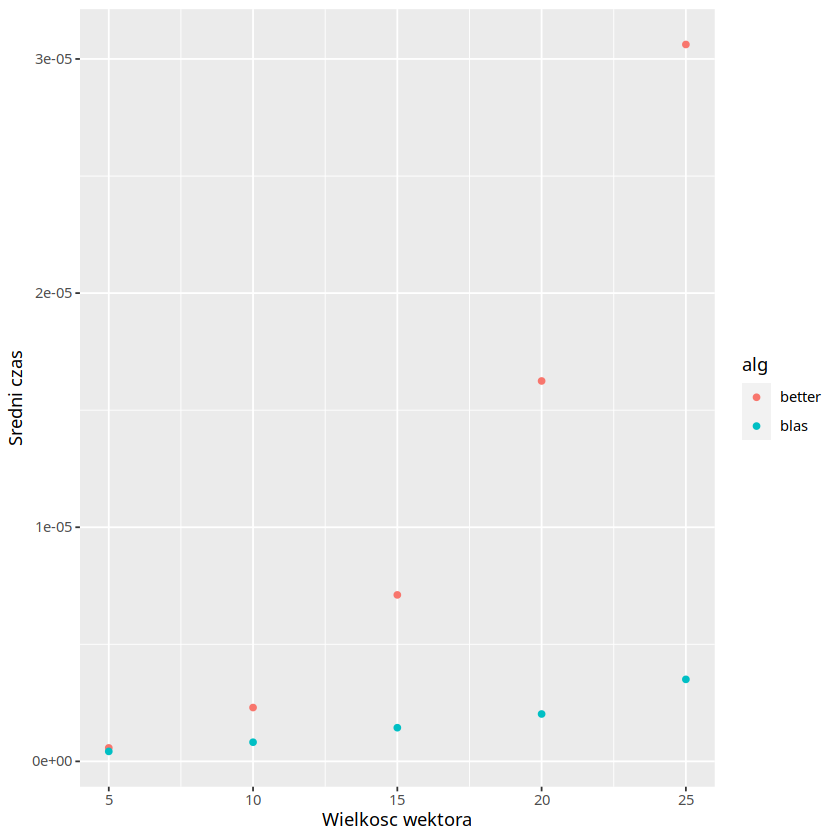

In [109]:
library(ggplot2)
g <- ggplot(grouped, aes(n,time,color=alg)) + geom_point()+ ylab("Sredni czas") + xlab("Wielkosc wektora")
g

#### 3. Wykresy powinny zawierać informację o odchyleniu standardowym dla uzyskanych wyników. Słupki błędów można narysować korzystając z funkcji geom_errorbar pakietu ggplot2

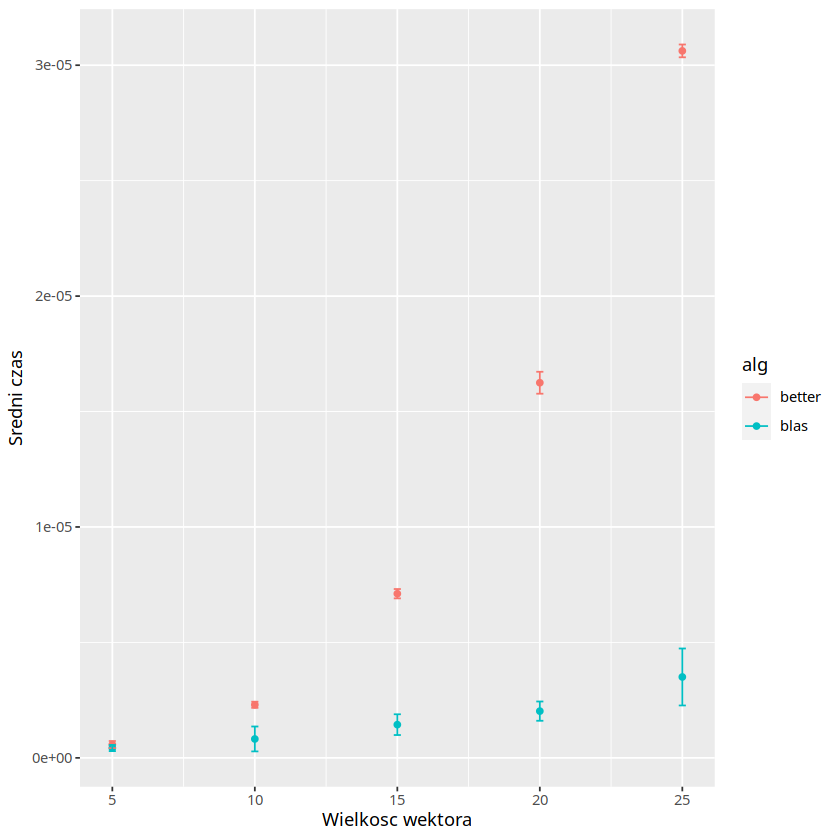

In [110]:
g <- g+ geom_errorbar(aes(ymin = time-time_sd, ymax = time+time_sd, width=.25))
g

#### 4. Użyć aproksymacji wielomianowej dostępnej w języku R do znalezienia odpowiednich wielomianów, które najlepiej pasują do wyników każdego z algorytmów. Dodać wykresy uzyskanych wielomianow do wykresu.

Wielomiany 3 stopnia najlepiej odwzorują wyniki danych algorytmów.

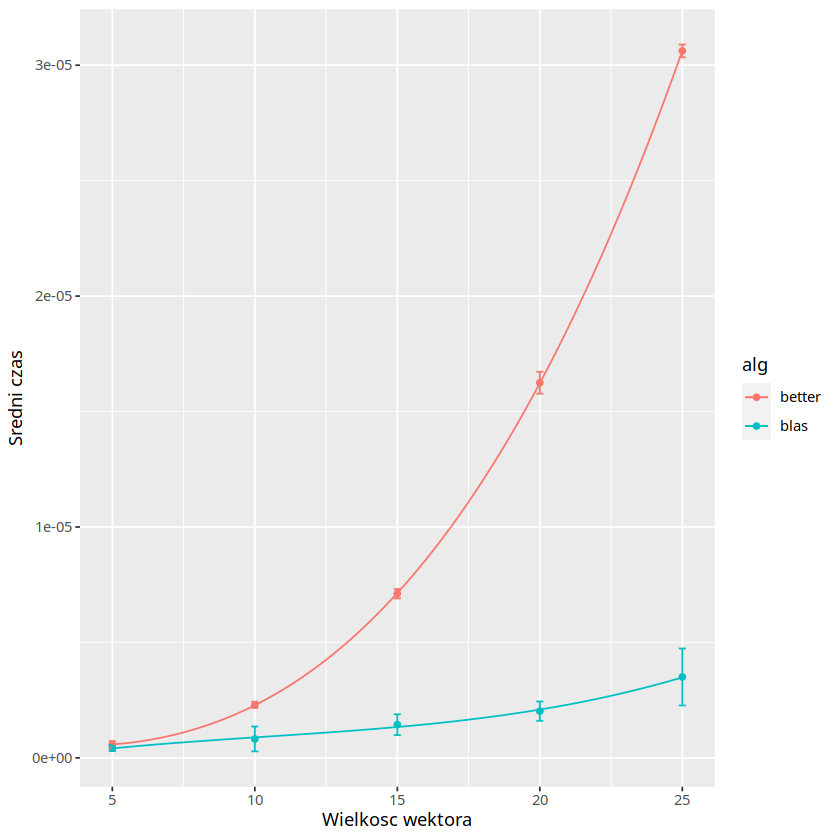

In [111]:
library(tidyverse)
blas <- grouped %>% filter(alg=="blas")
better <- grouped %>% filter(alg=="better")

x<- blas$n
y<- blas$time
data <- data.frame(x,y)
fit <- lm(y~ poly(x, 3, raw=TRUE), data=data)
#fit
#poly(x, 3, raw=TRUE)
blasdata = data.frame(x = seq(5, 25, length.out=250))
blasdata$y = predict(fit, newdata)
blasdata$alg<-"blas"

x<- better$n
y<- better$time
data <- data.frame(x,y)
fit <- lm(y~ poly(x, 3, raw=TRUE), data=data) 
#fit
#poly(x, 3, raw=TRUE)
betterdata = data.frame(x = seq(5, 25, length.out=250))
betterdata$y = predict(fit, newdata)
betterdata$alg<-"better"

last_plot() + geom_line(data=blasdata %>% add_row(betterdata), aes(x,y))